#**1. Executive Summary**

An extensive research on student academic performance has been conducted using institutional academic records. Data cleaning and processing together with analysis took place through the combination of Python and Google Colab with multiple data science tools. The evaluation concentrated on examining GPA patterns together with departmental success rates and teaching effectiveness and student advancement.

GPA values strongly lean toward higher grades and students from different majors experience varying levels of academic achievement while instructor grading shows significant variation. New proposals aim to enhance academic success by providing critical student support and training faculty members and reevaluating course material.

The analytical method allows stakeholders to gain meaningful insights which leads them to make better decisions for improving educational performance and operational performance.


#**2. Objective**

The main goal of this project involves extracting practical information from organized student performance records. Evaluation of academic data enables the project to examine student GPA development alongside enrollment movements and teaching effectiveness and department results.
* The initiative aims to recognize elements which create superior academic success and those that impede academic achievements.
* The project demonstrates methods to reveal potential institutional enhancement opportunities.
* The organization should provide research-backed suggestions for academic intervention approaches.
* The project enables stakeholders to create strategic academic planning initiatives through their support.

The established objective serves to benefit institutional student outcomes including educational achievement and graduation percentage and quality of instruction.


In [1]:
# Mounting google drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# To remove all the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [4]:
#!pip install dtale
#!pip install qgrid
#!pip install ipywidgets

In [5]:
# Important Libraries & Functions
import io
import os
import glob
import base64
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import plotly.graph_objects as go

from IPython.display import display, clear_output, HTML

#**3. Data Exploration**

In [6]:
# Define file path
file_dir = "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/"
file_paths = glob.glob(os.path.join(file_dir, "*.csv"))

In [7]:
# New file paths based on the provided reference path
file_paths = [
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2012.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2013.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2014.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2015.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2016.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2017.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2018.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2013.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2014.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2015.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2016.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2017.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2018.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2019.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSummer2015.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSummer2016.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSummer2017.csv",
    "/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSummer2019.csv"
]

# Display updated paths
file_paths

['/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2012.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2013.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2014.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2015.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2016.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2017.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visFall2018.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic_grades_report_cln_visSpring2013.csv',
 '/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/academic

In [8]:
# Extract semester and year from filenames
def extract_info(file_path):
    filename = file_path.split('_')[-1].replace('.csv', '')
    semester = ''.join([i for i in filename if not i.isdigit()]).replace('vis', '')
    year = ''.join([i for i in filename if i.isdigit()])
    return semester, year

In [9]:
# Load and merge data
combined_data = pd.DataFrame()
for file in file_paths:
    data = pd.read_csv(file)
    semester, year = extract_info(file)
    data['Semester'] = semester
    data['Year'] = year
    combined_data = pd.concat([combined_data, data], ignore_index=True)

In [10]:
# Dispalying dataset
combined_data.head()

,PIDM,Curr_1_Degc_Desc,Curr_1_1_Majr_Desc,Term_Code,Term_Desc,CRN,Subj_Code,Crse_Numb,Sect_Numb,Crse_Title,Grde_Code,Grde_Code_Qlty_Pnts,Credit_Hr,Instr_1_FMIL,Term_Inst_Hrs_Earned,Term_Inst_GPA,Inst_Hrs_Earned,Inst_GPA,Semester,Year
0,1692667,B.S. in Business Admin.,Business Admin - Mktg Con,201281,Fall 2012,80318,BUSI,10,2,Dean's Seminar,P,0.0,1.0,Horst Sylvester,17.0,3.59,123.0,3.10,Fall,2012
1,1672916,B.S. in Business Admin.,Business Admin - Bus Law Con,201281,Fall 2012,80079,ECON,51,1,Economic Principles & Problems,B-,2.7,3.0,Dennis O. Flynn,17.0,3.08,132.0,3.67,Fall,2012
2,1690451,B.S. in Mechanical Engineering,Mechanical Engineering,201281,Fall 2012,80650,PACS,1,1,What is a Good Society,C-,1.7,4.0,Heather M. Muser,13.0,2.62,120.0,2.14,Fall,2012
3,1672916,B.S. in Business Admin.,Business Admin - Bus Law Con,201281,Fall 2012,80942,POLS,60,1,Legal Study Seminar,P,0.0,1.0,Cynthia L. Ostberg,17.0,3.08,132.0,3.67,Fall,2012
4,1692667,B.S. in Business Admin.,Business Admin - Mktg Con,201281,Fall 2012,80500,MATH,5,1,Intermd. College Algebra & Lab,B+,3.3,3.0,Andrew J. Pitcher,17.0,3.59,123.0,3.10,Fall,2012


#**4. Data Pre-Processing**

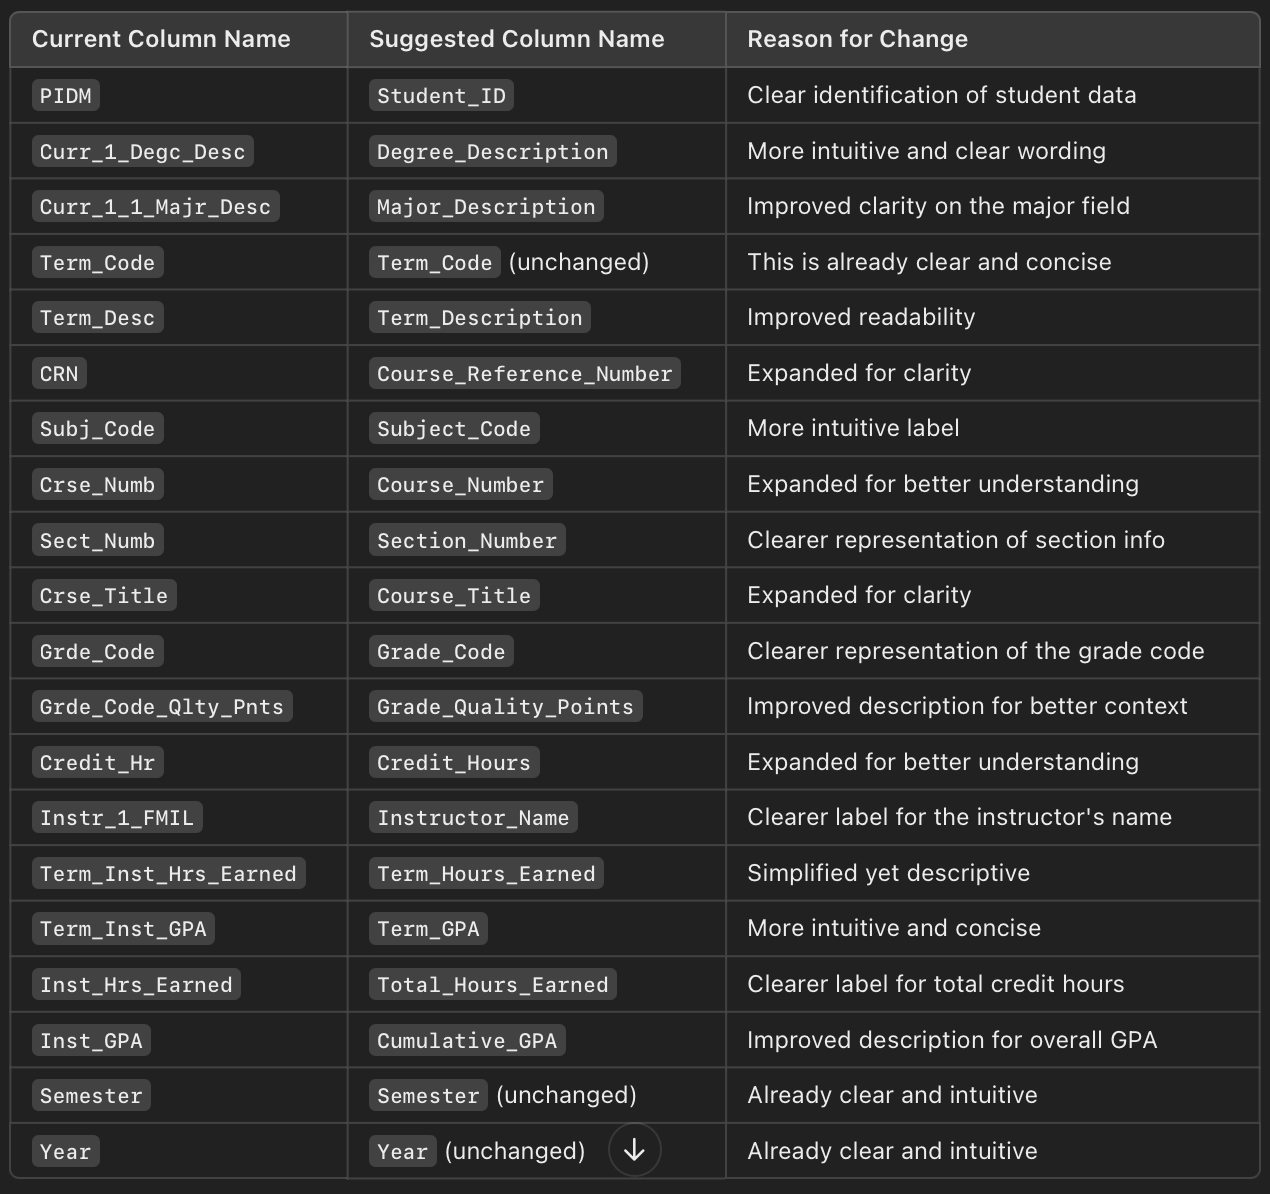

In [11]:
# Improved column names mapping
column_mapping = {
    'PIDM': 'Student_ID',
    'Curr_1_Degc_Desc': 'Degree_Description',
    'Curr_1_1_Majr_Desc': 'Major_Description',
    'Term_Code': 'Term_Code',
    'Term_Desc': 'Term_Description',
    'CRN': 'Course_Reference_Number',
    'Subj_Code': 'Subject_Code',
    'Crse_Numb': 'Course_Number',
    'Sect_Numb': 'Section_Number',
    'Crse_Title': 'Course_Title',
    'Grde_Code': 'Grade_Code',
    'Grde_Code_Qlty_Pnts': 'Grade_Quality_Points',
    'Credit_Hr': 'Credit_Hours',
    'Instr_1_FMIL': 'Instructor_Name',
    'Term_Inst_Hrs_Earned': 'Term_Hours_Earned',
    'Term_Inst_GPA': 'Term_GPA',
    'Inst_Hrs_Earned': 'Total_Hours_Earned',
    'Inst_GPA': 'Cumulative_GPA',
    'Semester': 'Semester',
    'Year': 'Year'
}

# Renaming columns
combined_data.rename(columns=column_mapping, inplace=True)

# Save the updated dataset
combined_data.to_csv('/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/combined_academic_grades.csv', index=False)

print("Dataset has been updated with improved column names and saved successfully.")

Dataset has been updated with improved column names and saved successfully.


In [12]:
# Save the combined dataset to a CSV file
combined_data.to_csv('/content/drive/MyDrive/Capstone_Project/academic_grades_2025project/combined_academic_grades.csv', index=False)

In [13]:
combined_data.head()

,Student_ID,Degree_Description,Major_Description,Term_Code,Term_Description,Course_Reference_Number,Subject_Code,Course_Number,Section_Number,Course_Title,Grade_Code,Grade_Quality_Points,Credit_Hours,Instructor_Name,Term_Hours_Earned,Term_GPA,Total_Hours_Earned,Cumulative_GPA,Semester,Year
0,1692667,B.S. in Business Admin.,Business Admin - Mktg Con,201281,Fall 2012,80318,BUSI,10,2,Dean's Seminar,P,0.0,1.0,Horst Sylvester,17.0,3.59,123.0,3.10,Fall,2012
1,1672916,B.S. in Business Admin.,Business Admin - Bus Law Con,201281,Fall 2012,80079,ECON,51,1,Economic Principles & Problems,B-,2.7,3.0,Dennis O. Flynn,17.0,3.08,132.0,3.67,Fall,2012
2,1690451,B.S. in Mechanical Engineering,Mechanical Engineering,201281,Fall 2012,80650,PACS,1,1,What is a Good Society,C-,1.7,4.0,Heather M. Muser,13.0,2.62,120.0,2.14,Fall,2012
3,1672916,B.S. in Business Admin.,Business Admin - Bus Law Con,201281,Fall 2012,80942,POLS,60,1,Legal Study Seminar,P,0.0,1.0,Cynthia L. Ostberg,17.0,3.08,132.0,3.67,Fall,2012
4,1692667,B.S. in Business Admin.,Business Admin - Mktg Con,201281,Fall 2012,80500,MATH,5,1,Intermd. College Algebra & Lab,B+,3.3,3.0,Andrew J. Pitcher,17.0,3.59,123.0,3.10,Fall,2012


In [14]:
df = combined_data.copy()

In [15]:
# Display dataset summary
summary = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Column Names": df,
    "Missing Values": df.isnull().sum().to_dict(),
    "Data Types": df.dtypes.to_dict()
}

In [16]:
# Check for duplicate rows
combined_data.duplicated().sum()

np.int64(0)

In [17]:
# Verify data types
combined_data.dtypes

,0
Student_ID,int64
Degree_Description,object
Major_Description,object
Term_Code,int64
Term_Description,object
Course_Reference_Number,int64
Subject_Code,object
Course_Number,object
Section_Number,object
Course_Title,object


In [18]:
# Rows * Columns for the datasets
combined_data.shape

(305, 20)

In [19]:
df = combined_data.copy()

#**5. Data Analysis & Visualization**

##5.1 Student Performance Insights

###5.1.1 GPA Distribution Analysis

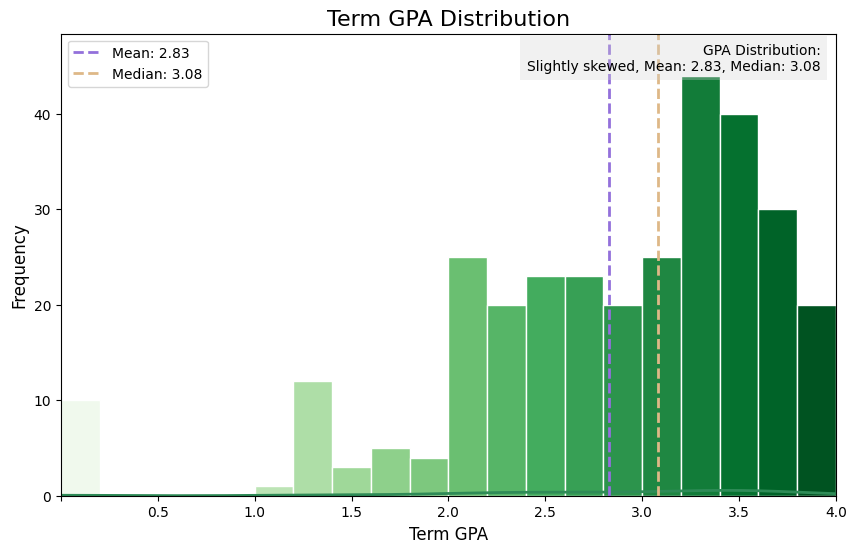

In [20]:
plt.figure(figsize=(10, 6))

# Create a gradient color palette for the histogram
n_bins = 20
colors = sns.color_palette("Greens", n_bins)

# Create the histogram with gradient colors
counts, bins, patches = plt.hist(df['Term_GPA'], bins=n_bins, edgecolor='white')

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Make KDE line bolder
sns.kdeplot(df['Term_GPA'], color="#2e8b57", linewidth=2)

plt.title("Term GPA Distribution", fontsize=16)
plt.xlabel("Term GPA", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Annotations
mean_gpa = df['Term_GPA'].mean()
median_gpa = df['Term_GPA'].median()

# Mean line in a lighter purple, thicker
plt.axvline(mean_gpa, color="#9370db", linestyle="--", linewidth=2, label=f"Mean: {mean_gpa:.2f}")

# Median line in a lighter brown, thicker
plt.axvline(median_gpa, color="#deb887", linestyle="--", linewidth=2, label=f"Median: {median_gpa:.2f}")

plt.legend()

# Adjust Y-axis limits
plt.ylim(0, max(counts) * 1.1)

# Set X-axis limits and ticks to start from 0 and go to 4
plt.xlim(0, 4)
ticks = np.arange(0, 4.5, 0.5)

# Hide the "0.0" label
tick_labels = [str(tick) if tick != 0 else "" for tick in ticks]
plt.xticks(ticks, tick_labels)

# Add text (narrative context) - Improved
plt.text(
    0.98,  # Adjusted x position
    0.98,  # Adjusted y position
    "GPA Distribution:\nSlightly skewed, Mean: 2.83, Median: 3.08",
    transform=plt.gca().transAxes,
    verticalalignment="top",
    horizontalalignment="right",  # Align to the right
    fontsize=10,  # Smaller font
    fontfamily="sans-serif",  # Cleaner font
    bbox=dict(facecolor='lightgray', alpha=0.3, edgecolor='none', pad=5)  # Subtle background
)

plt.show()

###5.1.2 Term-Wise GPA Trends

In [21]:
# Function to create a sortable term key
def create_sort_key(term):
    parts = term.split()
    year = int(parts[-1])  # Year is always the last part
    season = " ".join(parts[:-1])  # Season is everything before the year
    season_order = {"Fall": 3, "Spring": 1, "Summer": 2, "Summer I": 2.1, "Summer II": 2.2, "Summer III": 2.3}
    return year, season_order.get(season, 2)  # Default to 2 for general Summer

# Apply the function to create a sort key column
df['Sort_Key'] = df['Term_Description'].apply(create_sort_key)

# Sort the DataFrame by the sort key
df_sorted = df.sort_values(by='Sort_Key')

# Calculate the average GPA for each term (from the sorted DataFrame)
average_gpa_by_term = df_sorted.groupby('Term_Description')['Term_GPA'].mean()

# Create a gradient image
width, height = 800, 600
img = Image.new('RGB', (width, height))
draw = ImageDraw.Draw(img)
for i in range(height):
    r = int(240 + (220 - 240) * i / height)
    g = int(248 + (230 - 248) * i / height)
    b = int(255 + (250 - 255) * i / height)
    draw.line((0, i, width, i), fill=(r, g, b))

# Convert image to Base64
img_buffer = io.BytesIO()
img.save(img_buffer, format='PNG')
img_base64 = base64.b64encode(img_buffer.getvalue()).decode('utf-8')

# Create the Plotly figure
fig = go.Figure(go.Scatter(
    x=average_gpa_by_term.index,
    y=average_gpa_by_term.values,
    mode='lines+markers',
    line=dict(color='#1f77b4', width=3),
    marker=dict(size=8, color='#1f77b4'),
    hovertemplate='Term: %{x}<br>Average GPA: %{y:.2f}<extra></extra>',
    name='Average GPA'
))

# Add a trend line (smoother)
fig.add_trace(go.Scatter(
    x=average_gpa_by_term.index,
    y=average_gpa_by_term.values,
    mode='lines',
    line=dict(color='red', width=2, dash='dash'),
    name='Trend Line',
    hovertemplate='Trend Line<extra></extra>'
))

# Annotations for key points
fig.add_annotation(
    x='Summer II 2018', y=1.0,
    text="Lowest: 1.0",
    showarrow=True, arrowhead=2, ax=20, ay=-40,
    axref='x', ayref='y',
    font=dict(size=12, color='black')
)

highest_gpa_term = average_gpa_by_term.idxmax()
highest_gpa_value = average_gpa_by_term.max()

fig.add_annotation(
    x=highest_gpa_term, y=highest_gpa_value,
    text=f"Highest: {highest_gpa_value:.2f}",
    showarrow=True, arrowhead=2, ax=-20, ay=-40,
    axref='x', ayref='y',
    font=dict(size=12, color='black')
)

# Color the lowest and highest points
fig.add_trace(go.Scatter(
    x=['Summer II 2018'],
    y=[1.0],
    mode='markers',
    marker=dict(size=10, color='orange'),
    hovertemplate='Lowest GPA: 1.0<extra></extra>'
))

fig.add_trace(go.Scatter(
    x=[highest_gpa_term],
    y=[highest_gpa_value],
    mode='markers',
    marker=dict(size=10, color='green'),
    hovertemplate=f'Highest GPA: {highest_gpa_value:.2f}<extra></extra>'
))

# Add background colors for Fall, Spring, and Summer
fall_terms = [term for term in average_gpa_by_term.index if "Fall" in term]
spring_terms = [term for term in average_gpa_by_term.index if "Spring" in term]
summer_terms = [term for term in average_gpa_by_term.index if "Summer" in term]

fig.add_shape(type="rect",
    x0=fall_terms[0], y0=0, x1=fall_terms[-1], y1=4,
    fillcolor="rgba(173, 216, 230, 0.2)", line=dict(width=0))  # Light blue for Fall

fig.add_shape(type="rect",
    x0=spring_terms[0], y0=0, x1=spring_terms[-1], y1=4,
    fillcolor="rgba(144, 238, 144, 0.2)", line=dict(width=0))  # Light green for Spring

fig.add_shape(type="rect",
    x0=summer_terms[0], y0=0, x1=summer_terms[-1], y1=4,
    fillcolor="rgba(255, 250, 205, 0.2)", line=dict(width=0))  # Light yellow for Summer

# Update layout
fig.update_layout(
    title=dict(
        font=dict(size=24, color='#333', family="Arial, sans-serif"),
        x=0.5, xanchor='center'
    ),
    title_y=0.95,
    xaxis_title="Term",
    yaxis_title="Average GPA (4.0 Scale)",
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=100, b=50),
    hovermode='x unified',
    transition_duration=500,
    legend=dict(
        x=0.01, y=0.99,
        bordercolor="black", borderwidth=1,
        bgcolor="rgba(255, 255, 255, 0.5)"
    ),
    annotations=[
        dict(
            x=0.5, y=1.05, xref="paper", yref="paper",
            text="Lowest GPA in Summer II 2018. Overall upward trend.",
            showarrow=False, align="center", bordercolor="black", borderwidth=1, borderpad=4, bgcolor="rgba(255, 255, 255, 0.5)"
        )
    ],
    xaxis=dict(showline=True, linewidth=1, linecolor='black'),
    yaxis=dict(showline=True, linewidth=1, linecolor='black')
)

# Use full term labels for x-axis
fig.update_xaxes(tickvals=average_gpa_by_term.index, ticktext=average_gpa_by_term.index)

# Show the figure
fig.show()

###5.1.3 Top and Bottom Performing Majors

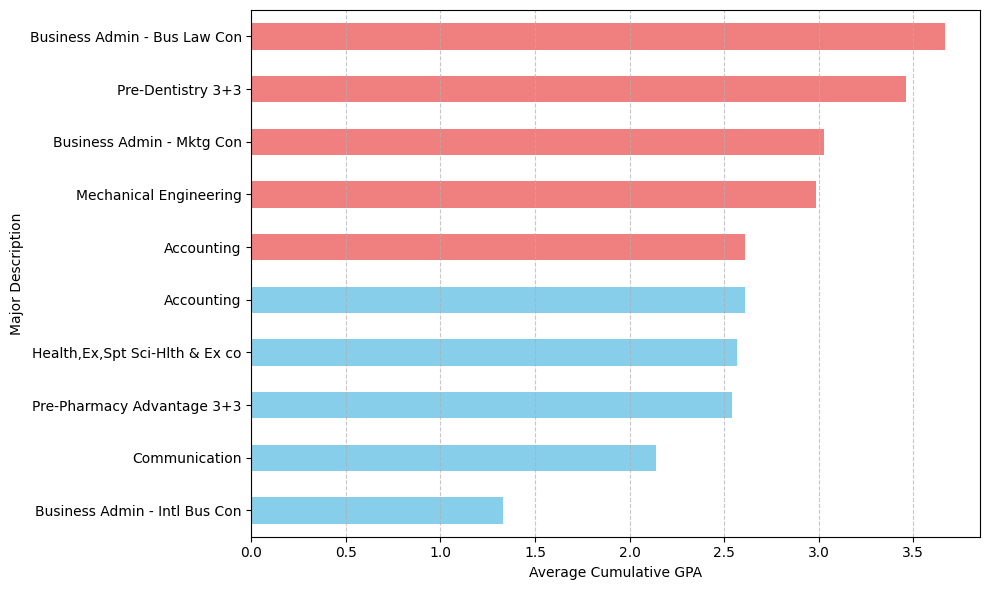

In [22]:
# Grouping and sorting majors by average GPA
top_bottom_majors = df.groupby("Major_Description")["Cumulative_GPA"].mean().sort_values()

# Selecting bottom and top 5 majors
bottom_majors = top_bottom_majors.head(5)
top_majors = top_bottom_majors.tail(5)

# Combining for visualization
top_bottom_df = pd.concat([bottom_majors, top_majors])

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
top_bottom_df.plot(kind='barh', color=['skyblue']*5 + ['lightcoral']*5)
plt.xlabel("Average Cumulative GPA")
plt.ylabel("Major Description")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###5.1.4 Instructor Performance Analysis


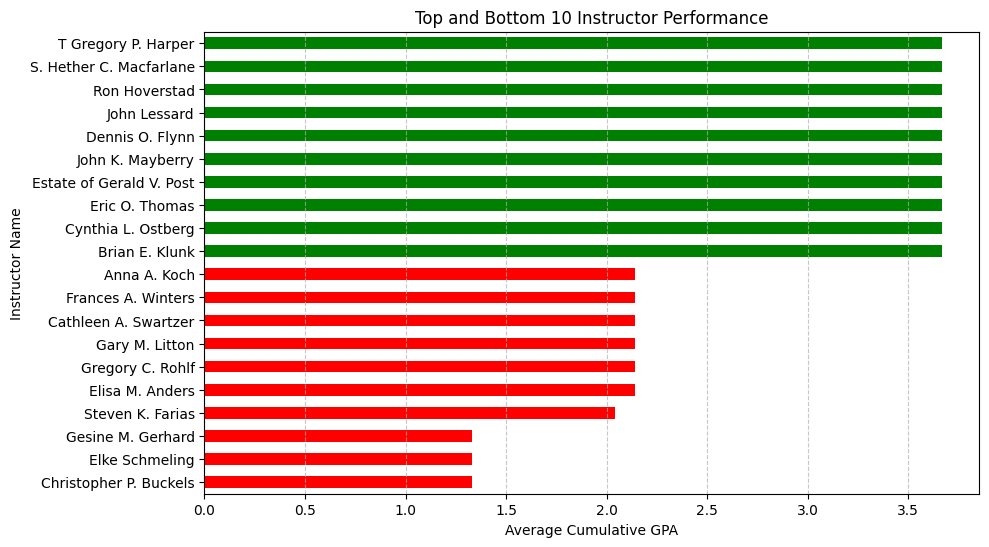

In [23]:
# Grouping data by Instructor and calculating the mean GPA
instructor_gpa = df.groupby("Instructor_Name")["Cumulative_GPA"].mean().sort_values()

# Selecting top and bottom 10 instructors
top_instructors = instructor_gpa.tail(10)
bottom_instructors = instructor_gpa.head(10)
selected_instructors = pd.concat([bottom_instructors, top_instructors])

# Creating a bar chart for selected instructors
pivot_table = df[df['Instructor_Name'].isin(selected_instructors.index)].groupby("Instructor_Name")["Cumulative_GPA"].mean().sort_values()

# Define colors: Red for low GPA, Green for high GPA
colors = ["red" if gpa < 2.5 else "green" for gpa in pivot_table]

plt.figure(figsize=(10, 6))
pivot_table.plot(kind="barh", color=colors)
plt.xlabel("Average Cumulative GPA")
plt.ylabel("Instructor Name")
plt.title("Top and Bottom 10 Instructor Performance")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##5.2 Student Progression and Retention

###5.2.1 Credit Hour vs GPA Correlation

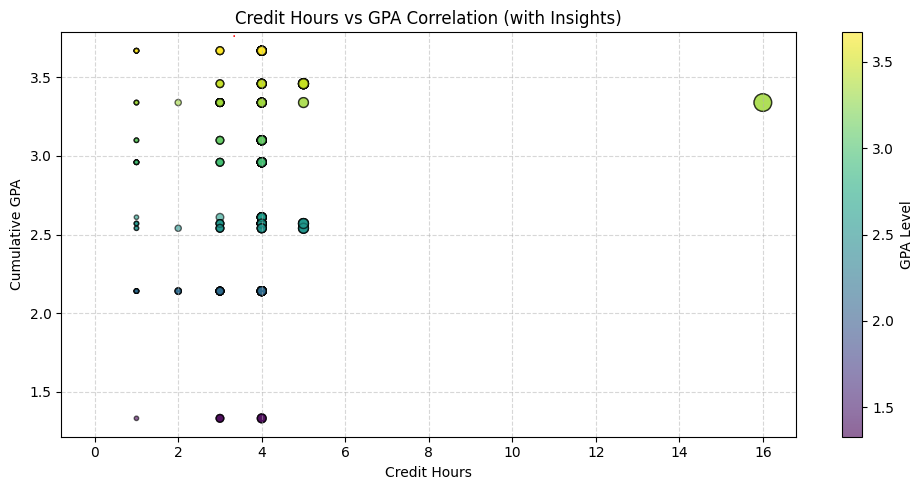

In [24]:
# Creating a bubble chart
plt.figure(figsize=(10, 5))
bubble_chart = plt.scatter(
    x=df['Credit_Hours'],
    y=df['Cumulative_GPA'],
    s=df['Credit_Hours'] * 10,  # Bubble size scaled by credit hours
    c=df['Cumulative_GPA'],     # Color intensity based on GPA
    cmap='viridis',
    alpha=0.6,
    edgecolors='k'
)

# Adding a color bar to indicate GPA levels
plt.colorbar(bubble_chart, label='GPA Level')

# Title and axis labels
plt.title('Credit Hours vs GPA Correlation (with Insights)')
plt.xlabel('Credit Hours')
plt.ylabel('Cumulative GPA')

# Annotate key points (e.g., extreme GPA values or heavy credit loads)
max_gpa = df[df['Cumulative_GPA'] == df['Cumulative_GPA'].max()]
plt.annotate('.',
             (max_gpa['Credit_Hours'].values[0], max_gpa['Cumulative_GPA'].values[0]),
             textcoords="offset points", xytext=(10, 10), ha='center', fontsize=10, color='red')

# Grid and visual enhancements
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

###5.2.2 Student Progression Analysis

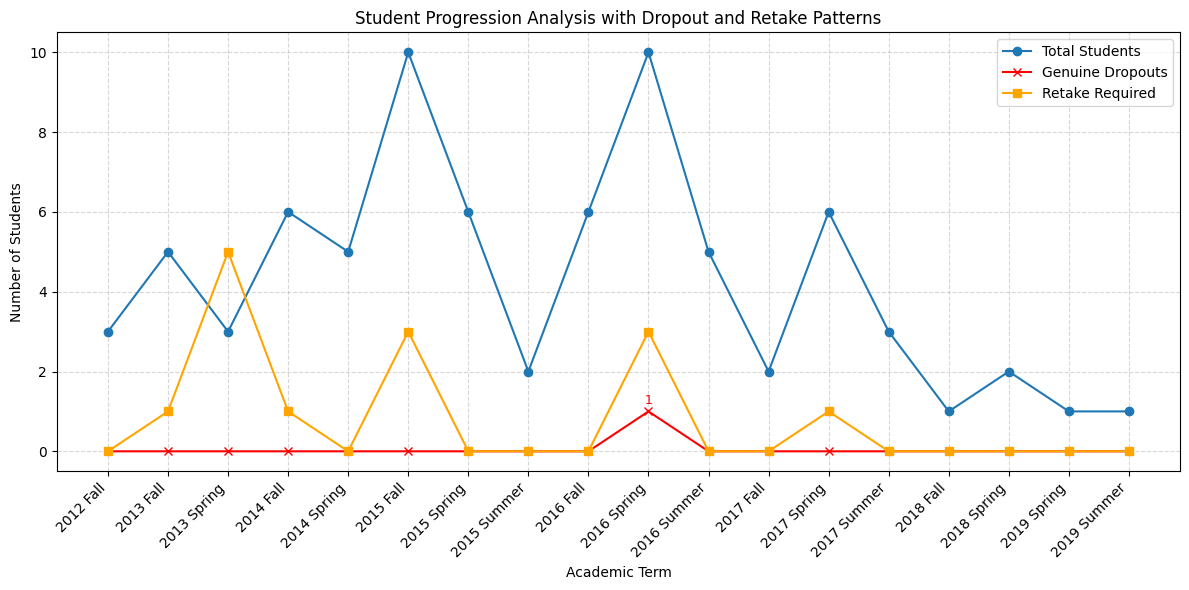

In [25]:
df['Term'] = df['Year'].astype(str) + ' ' + df['Semester']

#Identify students with grades that suggest retake or potential dropout
retake_grades = ['W', 'F#', 'FW']
df['Retake_Required'] = df['Grade_Code'].isin(retake_grades).astype(int)

#Identify each student's last known term
last_term = df.groupby('Student_ID')['Term_Code'].max().reset_index()
last_term.columns = ['Student_ID', 'Last_Term']

#Identify students who disappear after receiving 'W', 'F#', or 'FW'
df = df.merge(last_term, on='Student_ID', how='left')
df['Next_Term_Code'] = df.groupby('Student_ID')['Term_Code'].shift(-1)

# Mark genuine dropouts — Students who disappear after retake grades
df['Dropped'] = ((df['Next_Term_Code'].isnull()) & (df['Retake_Required'] == 1)).astype(int)

# Aggregate data for visualization
progression_data = df.groupby('Term').agg({
    'Student_ID': 'nunique',        # Unique students per term
    'Dropped': 'sum',               # Genuine dropouts
    'Retake_Required': 'sum'        # Students flagged for retake
}).reset_index()

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(progression_data['Term'], progression_data['Student_ID'], label='Total Students', marker='o')
plt.plot(progression_data['Term'], progression_data['Dropped'], label='Genuine Dropouts', marker='x', color='red')
plt.plot(progression_data['Term'], progression_data['Retake_Required'], label='Retake Required', marker='s', color='orange')

# Adding markers for dropout points
for i, row in progression_data.iterrows():
    if row['Dropped'] > 0:
        plt.annotate(f"{row['Dropped']}",
                     (row['Term'], row['Dropped']),
                     textcoords="offset points",
                     xytext=(0, 5), ha='center', fontsize=9, color='red')

# Enhancing visualization
plt.title('Student Progression Analysis with Dropout and Retake Patterns')
plt.xlabel('Academic Term')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


###5.2.3 Pass/Fail Analysis for Key Subjects

In [26]:
# Define passing grades
passing_grades = {'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-'}

# Create a new column for Pass/Fail classification
df['Pass_Fail'] = np.where(df['Grade_Code'].isin(passing_grades), 'Pass', 'Fail')

# Aggregate Pass/Fail counts by Subject_Code
subject_pass_fail = df.groupby(['Subject_Code', 'Pass_Fail']).size().unstack().fillna(0)

# Select top 10 subjects with the most students
top_subjects = subject_pass_fail.sum(axis=1).nlargest(10).index
subject_pass_fail_top = subject_pass_fail.loc[top_subjects].reset_index()

# Convert to long format for Plotly
subject_pass_fail_melted = subject_pass_fail_top.melt(id_vars='Subject_Code', var_name='Pass_Fail', value_name='Count')

# Create a dictionary mapping subject codes to full names
subject_name_mapping = {
    "BUSI": "Business",
    "PACS": "Pacific Studies",
    "MATH": "Mathematics",
    "COMM": "Communication",
    "BIOL": "Biology",
    "ACTY": "Accounting",
    "ENGR": "Engineering",
    "MECH": "Mechanical Engineering",
    "CHEM": "Chemistry",
    "ECON": "Economics"
}

# Create interactive stacked bar chart using Plotly
fig = px.bar(
    subject_pass_fail_melted,
    x="Subject_Code",
    y="Count",
    color="Pass_Fail",
    text="Count",
    title="Pass/Fail Analysis for Key Subjects",
    labels={"Subject_Code": "Subjects", "Count": "Number of Students"},
    color_discrete_map={"Pass": "yellow", "Fail": "purple"},
    barmode="stack"
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(tickangle=-45),
    yaxis_title="Number of Students",
    xaxis_title="Subjects",
    hovermode="x",
    legend_title="Pass/Fail"
)

# Create a table to display subject codes and full names on the right side
table = go.Table(
    header=dict(
        values=["Subject Code", "Full Subject Name"],
        fill_color="lightgrey",
        align="left"
    ),
    cells=dict(
        values=[list(subject_name_mapping.keys()), list(subject_name_mapping.values())],
        fill_color="white",
        align="left"
    )
)

# Create a subplot to place the bar chart and table side by side
from plotly.subplots import make_subplots

fig_combined = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],  # Adjust width for better layout
    subplot_titles=("Pass/Fail Analysis", "Subject Code Reference"),
    specs=[[{"type": "xy"}, {"type": "table"}]]
)

# Add bar chart
fig_combined.add_trace(fig.data[0], row=1, col=1)
fig_combined.add_trace(fig.data[1], row=1, col=1)

# Add table
fig_combined.add_trace(table, row=1, col=2)

# Update layout
fig_combined.update_layout(
    title_text="Pass/Fail Analysis for Key Subjects with Subject Reference",
    showlegend=True
)

# Show the interactive plot
fig_combined.show()

###5.2.4 Graduation Rate Analysis

##5.3 Course & Department Insights

###5.3.1a Department-Wise Performance Overview

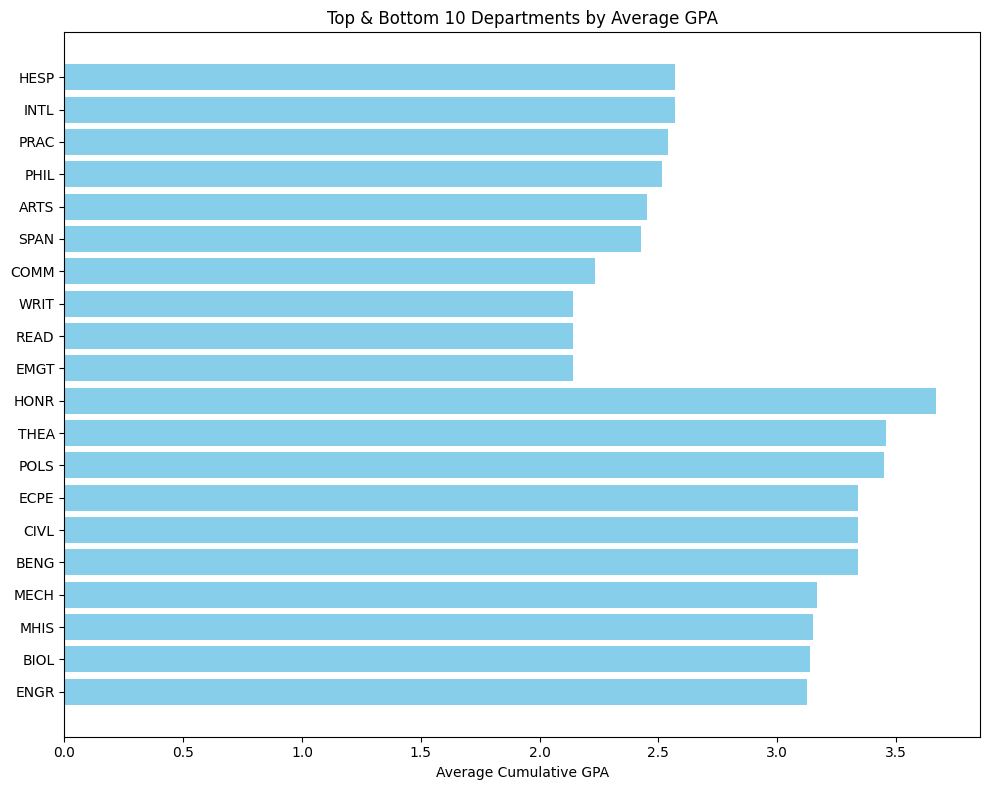

In [27]:
# Group by department code and calculate average cumulative GPA
dept_gpa = df.groupby("Subject_Code")["Cumulative_GPA"].mean().sort_values()

# Select bottom 10 and top 10 departments
bottom_10 = dept_gpa.head(10)
top_10 = dept_gpa.tail(10)

# Combine them for visualization
subset_gpa = pd.concat([top_10, bottom_10])

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjusted height and width to fit labels
plt.barh(subset_gpa.index, subset_gpa.values, color='skyblue')
plt.xlabel('Average Cumulative GPA')
plt.title('Top & Bottom 10 Departments by Average GPA')
plt.tight_layout()
plt.savefig("Top_Bottom_Departments_GPA.png", dpi=300)
plt.show()

###5.3.1b Top & Bottom 10 Departments by Average GPA:


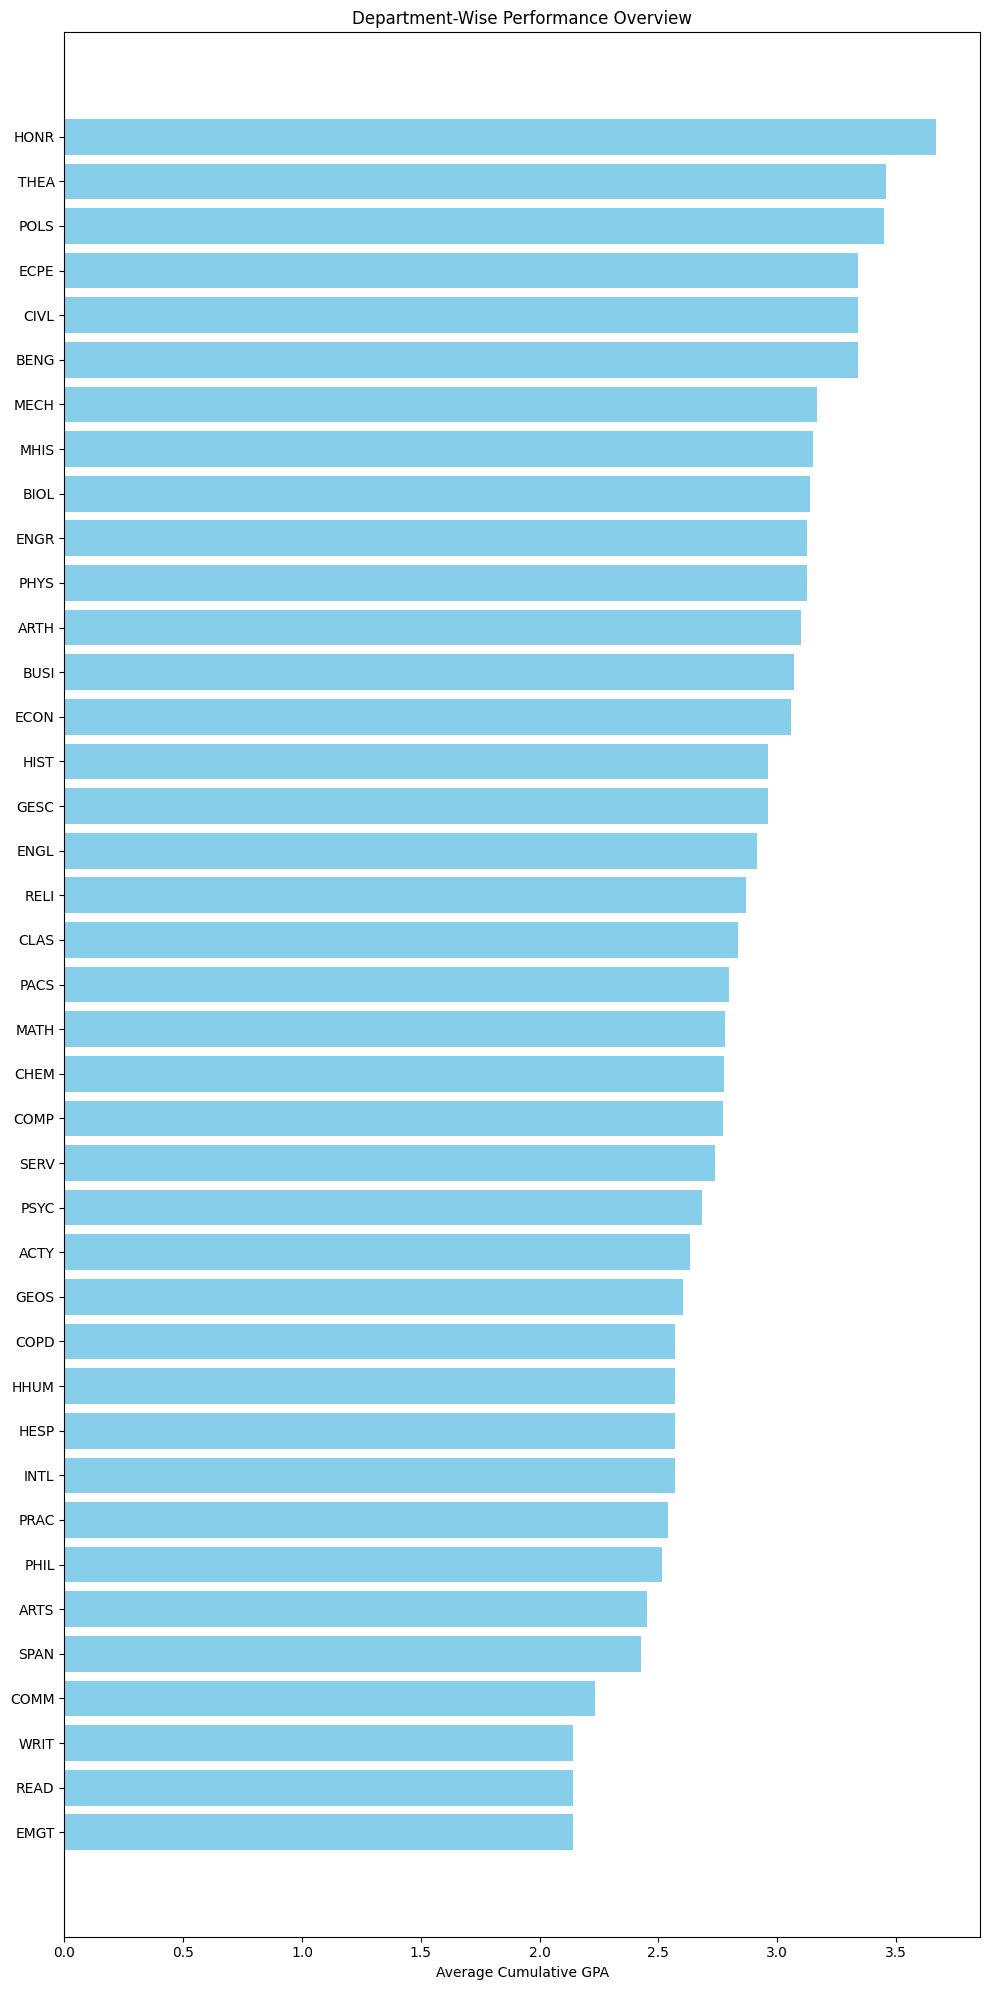

In [28]:
# Group by department (Subject_Code) and compute average GPA
dept_gpa = df.groupby("Subject_Code")["Cumulative_GPA"].mean().sort_values()

# Plot with full figure height to display all departments
plt.figure(figsize=(10, 20))  # Key difference: taller height for full chart
plt.barh(dept_gpa.index, dept_gpa.values, color='skyblue')
plt.xlabel("Average Cumulative GPA")
plt.title("Department-Wise Performance Overview")
plt.tight_layout()
plt.savefig("Full_Department_Performance_Clean.png", dpi=300)
plt.show()

###5.3.2 Elective Course Popularity

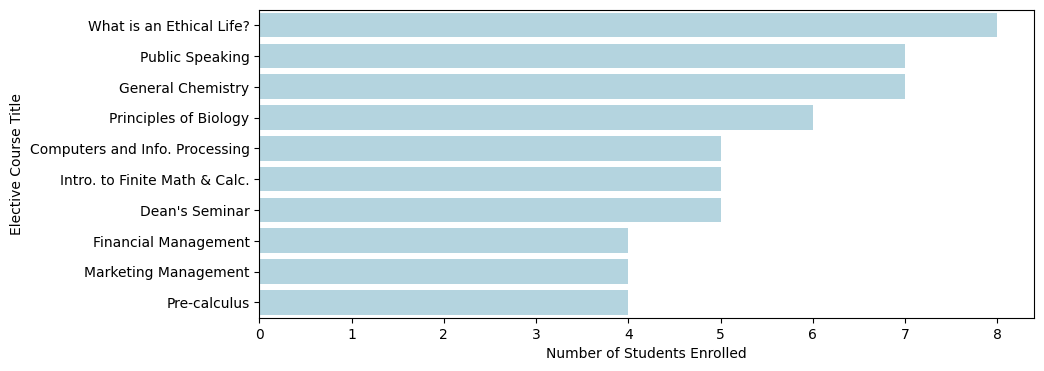

In [29]:
course_counts = df["Course_Title"].value_counts()

# Plot the top 10 most popular elective courses in light blue
plt.figure(figsize=(10, 4))
sns.barplot(y=course_counts.head(10).index, x=course_counts.head(10).values, color="lightblue")
plt.xlabel("Number of Students Enrolled")
plt.ylabel("Elective Course Title")
plt.show()

##5.4 Key Performance Metrics for Stakeholders

###5.4.1 Overall Student Academic Performance Dashboard


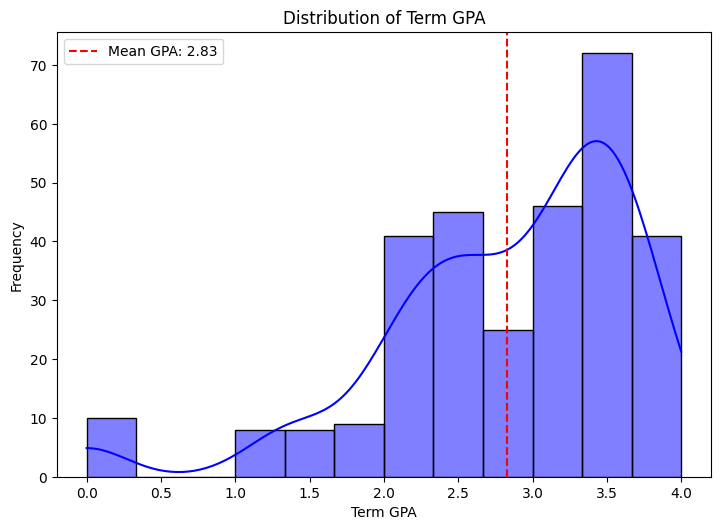

In [30]:
# Set up the dashboard layout
plt.figure(figsize=(14, 10))

# 1. Term GPA Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Term_GPA'], kde=True, color='blue', alpha=0.5)
mean_gpa = df['Term_GPA'].mean()
plt.axvline(mean_gpa, color='red', linestyle='--', label=f'Mean GPA: {mean_gpa:.2f}')
plt.title('Distribution of Term GPA')
plt.xlabel('Term GPA')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and display the dashboard
plt.tight_layout()
plt.show()

###5.4.2 Average Cumulative GPA by Degree

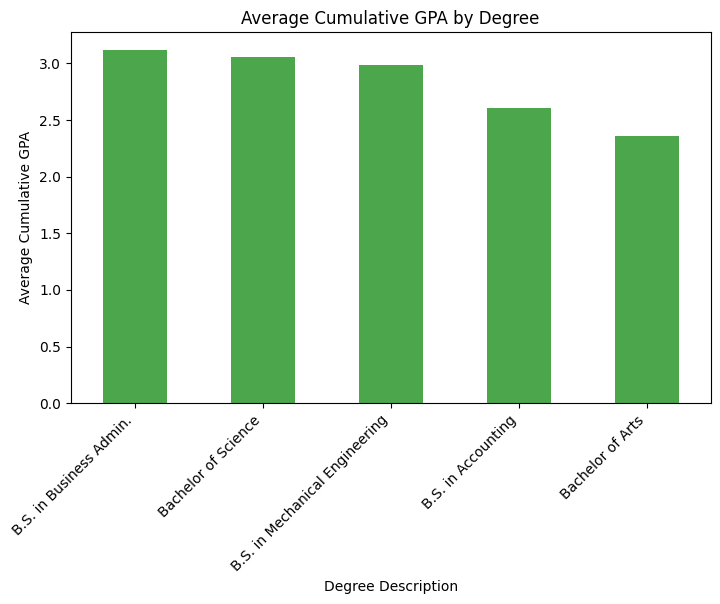

In [31]:
# Set up the dashboard layout
plt.figure(figsize=(14, 10))

# 2. Average Cumulative GPA by Degree
plt.subplot(2, 2, 2)
avg_cumulative_gpa = df.groupby('Degree_Description')['Cumulative_GPA'].mean().sort_values(ascending=False)
avg_cumulative_gpa.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Cumulative GPA by Degree')
plt.ylabel('Average Cumulative GPA')
plt.xlabel('Degree Description')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the dashboard
plt.tight_layout()
plt.show()

###5.4.3 Grade Distribution Across All Courses

<Figure size 1600x800 with 0 Axes>

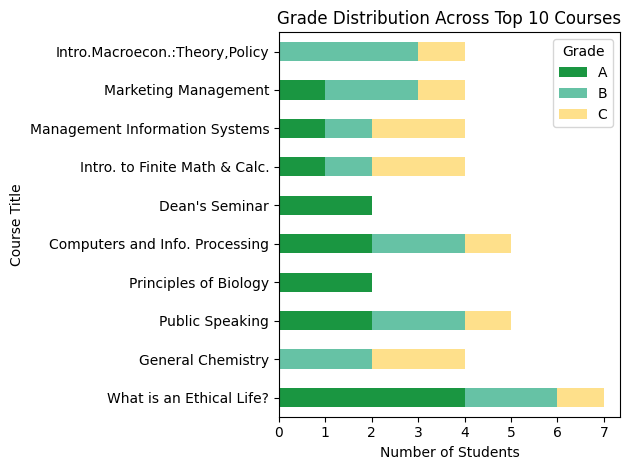

In [32]:
# Prepare data for visualizations
grade_counts = df.groupby(['Course_Title', 'Grade_Code']).size().unstack(fill_value=0).fillna(0)

# Create a mapping for grade aggregation
grade_mapping = {
    'A+': 'A', 'A-': 'A', 'A': 'A',
    'B+': 'B', 'B-': 'B', 'B': 'B',
    'C+': 'C', 'C-': 'C', 'C': 'C',
    # Add mappings for other grades if needed, e.g., 'D+': 'D', etc.
}

# Apply grade mapping
df['Grade_Code'] = df['Grade_Code'].replace(grade_mapping)


grade_counts = df.groupby(['Course_Title', 'Grade_Code']).size().unstack(fill_value=0).fillna(0)
grade_counts['Total'] = grade_counts.sum(axis=1)
grade_counts = grade_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Select the top N courses
top_n = 10
top_courses = grade_counts.head(top_n)

# Filter the data to include only the desired grade codes 'A', 'B', 'C'
grades_to_show = ['A', 'B', 'C']
top_courses = top_courses.reindex(columns=grades_to_show, fill_value=0)

# Create the horizontal bar chart
plt.figure(figsize=(16, 8))
ax = top_courses.plot(kind='barh', stacked=True, color=['#1a9641', '#66c2a5', '#fee08b']) #A as green

plt.title(f'Grade Distribution Across Top {top_n} Courses')
plt.xlabel('Number of Students')
plt.ylabel('Course Title')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, grades_to_show, title='Grade', loc='best')

plt.tight_layout()
plt.show()


###5.4.4 Top Instructor Impact on Term GPA

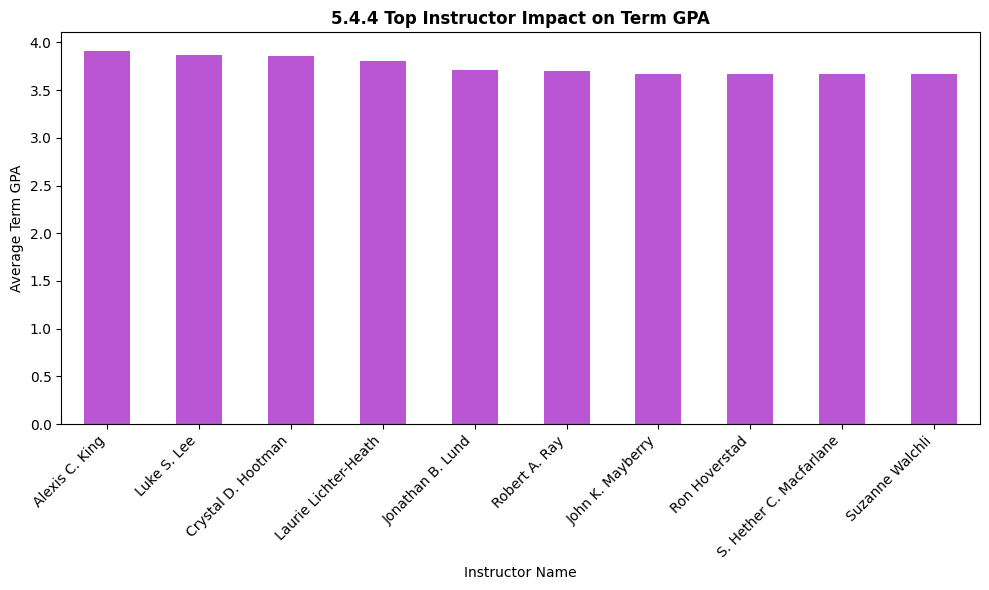

In [33]:
# Remove the instructor Eric O. Thomas
df = df[df["Instructor_Name"] != "Eric O. Thomas"]

# Group by Instructor Name and get the top 10 by average Term GPA
top_instructors = (
    df.groupby("Instructor_Name")["Term_GPA"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
top_instructors.plot(kind='bar', color='mediumorchid')

# Titles and labels
plt.title('5.4.4 Top Instructor Impact on Term GPA', fontweight='bold')
plt.xlabel('Instructor Name')
plt.ylabel('Average Term GPA')
plt.xticks(rotation=45, ha='right')

# Layout for neatness
plt.tight_layout()

# Display the plot
plt.show()

###5.4.5 Performance Comparison Between Years/Terms

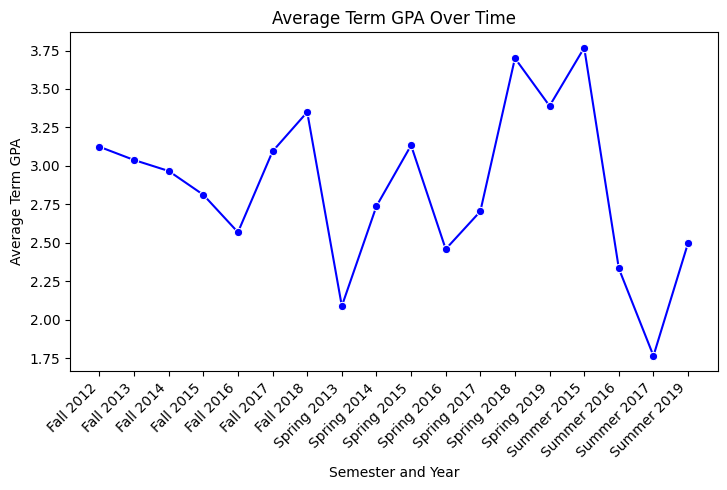

In [34]:
# Combine Semester and Year for grouping
df['Semester_Year'] = df['Semester'] + ' ' + df['Year'].astype(str)

# Group data by Semester_Year and calculate average Term GPA and Cumulative GPA
performance_trends = df.groupby('Semester_Year').agg({'Term_GPA': 'mean', 'Cumulative_GPA': 'mean'}).reset_index()

# Set up the layout for comparison
plt.figure(figsize=(14, 5))

# 1. Average Term GPA Over Time
plt.subplot(1, 2, 1)
sns.lineplot(data=performance_trends, x='Semester_Year', y='Term_GPA', marker='o', color='blue')
plt.title('Average Term GPA Over Time')
plt.xlabel('Semester and Year')
plt.ylabel('Average Term GPA')
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the dashboard
plt.tight_layout()
plt.show()

#Filter Selection

In [35]:
# Combine Subject + Course Number into a single Course Code
df['Course_Code'] = df['Subject_Code'].astype(str) + '-' + df['Course_Number'].astype(str)

# Clean and prepare data
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['Year'] = df['Year'].astype(int)

# Ensure GPA columns are numeric
df['Term_GPA'] = pd.to_numeric(df['Term_GPA'], errors='coerce')
df['Cumulative_GPA'] = pd.to_numeric(df['Cumulative_GPA'], errors='coerce')

# Dropdown/slider options
available_years = sorted(df['Year'].unique())
default_year = 2015 if 2015 in available_years else available_years[0]
term_options = sorted(df['Term_Description'].dropna().unique())
major_options = sorted(df['Major_Description'].dropna().unique())
instructor_options = sorted(df['Instructor_Name'].dropna().unique())
course_options = sorted(df['Course_Code'].dropna().unique())
credit_range = (int(df['Credit_Hours'].min()), int(df['Credit_Hours'].max()))
term_gpa_range = (round(df['Term_GPA'].min(), 2), round(df['Term_GPA'].max(), 2))
cum_gpa_range = (round(df['Cumulative_GPA'].min(), 2), round(df['Cumulative_GPA'].max(), 2))

# Widgets
year_slider = widgets.IntSlider(value=default_year, min=min(available_years), max=max(available_years), step=1, description='Select Year:')
term_dropdown = widgets.Dropdown(options=['All'] + term_options, description='Term:')
major_dropdown = widgets.Dropdown(options=['All'] + major_options, description='Major:')
instructor_dropdown = widgets.Dropdown(options=['All'] + instructor_options, description='Instructor:')
course_dropdown = widgets.Dropdown(options=['All'] + course_options, description='Course Code:')
credit_slider = widgets.IntRangeSlider(value=credit_range, min=credit_range[0], max=credit_range[1], step=1, description='Credit Hours:', layout=widgets.Layout(width='60%'))
term_gpa_slider = widgets.FloatRangeSlider(value=term_gpa_range, min=term_gpa_range[0], max=term_gpa_range[1], step=0.01, description='Term GPA:', layout=widgets.Layout(width='60%'))
cum_gpa_slider = widgets.FloatRangeSlider(value=cum_gpa_range, min=cum_gpa_range[0], max=cum_gpa_range[1], step=0.01, description='Cumulative GPA:', layout=widgets.Layout(width='60%'))

# Output display
output = widgets.Output()

# Filtering logic
def filter_data(year, term, major, instructor, course, credit_hours, term_gpa, cum_gpa):
    with output:
        clear_output()
        filtered = df[df['Year'] == year]
        if term != 'All':
            filtered = filtered[filtered['Term_Description'] == term]
        if major != 'All':
            filtered = filtered[filtered['Major_Description'] == major]
        if instructor != 'All':
            filtered = filtered[filtered['Instructor_Name'] == instructor]
        if course != 'All':
            filtered = filtered[filtered['Course_Code'] == course]
        filtered = filtered[
            (filtered['Credit_Hours'] >= credit_hours[0]) & (filtered['Credit_Hours'] <= credit_hours[1]) &
            (filtered['Term_GPA'] >= term_gpa[0]) & (filtered['Term_GPA'] <= term_gpa[1]) &
            (filtered['Cumulative_GPA'] >= cum_gpa[0]) & (filtered['Cumulative_GPA'] <= cum_gpa[1])
        ]
        if filtered.empty:
            print("⚠️ No matching records. Try adjusting the filters.")
        else:
            display(filtered.head(10))
            print(f"\nTotal matching rows: {len(filtered)}")

# UI Layout
ui = widgets.VBox([
    year_slider,
    term_dropdown,
    major_dropdown,
    instructor_dropdown,
    course_dropdown,
    credit_slider,
    term_gpa_slider,
    cum_gpa_slider
])

# Interactive binding
interactive_out = widgets.interactive_output(
    filter_data,
    {
        'year': year_slider,
        'term': term_dropdown,
        'major': major_dropdown,
        'instructor': instructor_dropdown,
        'course': course_dropdown,
        'credit_hours': credit_slider,
        'term_gpa': term_gpa_slider,
        'cum_gpa': cum_gpa_slider
    }
)

# Display dashboard
display(ui, output)


Output()

#**6. Reccomendations**

* Personalized Academic Support : Create individualized support plans including one-on-one mentoring and tailored workshops for students consistently scoring below average GPA

* Faculty Mentorship & Peer Reviews : Launch a structured faculty mentorship program to share best teaching practices, supported by anonymous peer evaluations and feedback loops

* Summer Session Optimization : Standardize summer course formats with assistant-led review sessions, consistent assessments, and focused remediation modules

* Curriculum Overhaul for High-Risk Courses : Redesign courses like ACTY with high failure rates by integrating hands-on labs, real-world cases, and enhanced faculty training

* Live Academic Performance Dashboards : Deploy institution-wide dashboards to visualize GPA trends, dropouts, and retake metrics in real-time for informed decision-making.

* GPA-Based Early Alert System : Use AI or rule-based tools to flag at-risk students early using GPA drop patterns, credit loads, and course failures for rapid intervention

* Unified Grading Policies : Implement standardized grading rubrics across all departments to ensure fairness, transparency, and reduced instructor-level variability.

* Tailored Academic Advising : Empower advisors with tools to help students plan balanced course loads, reducing overload risk and boosting term-wise success.

* Strategic Departmental Investment : Allocate additional resources—staffing, facilities, and training—to departments with persistent underperformance or high attrition.

* Elective Modernization Campaign : Reposition under-enrolled electives by highlighting career relevance, skill development, and cross-disciplinary application.

* Standardization of Academic Data : Run audits to normalize department codes, course IDs, and grade types to improve consistency in analysis and reporting.

* Integrated Mental Health Support : Combine wellness initiatives like stress relief programs and counseling access directly into the academic calendar and syllabus support.

* Longitudinal Student Tracking : Monitor student cohorts across academic years to assess policy impact, identify barriers, and fine-tune retention strategies.

* Dedicated Academic Intelligence Unit : Form a central team to continuously analyze educational data and recommend agile academic policy adjustments grounded in evidence.


#**7. Conclusion**

Analysis and visualization tools from Python successfully converted educational datasets into meaningful information that produces actionable findings. The study revealed essential patterns regarding GPA distributions as well as departmental results and instructor effects and course performance outcomes which will guide organizational changes.

The suggested recommendations including specific student aid programs alongside teaching method modifications will help institutions build equal learning environments that are more effective. Using interactive dashboards and cloud-based collaboration tools alongside machine learning capabilities enables organizations to base their choices both on data and the needs of students.

An academic environment that withstands competition yet remains inclusive for students will emerge through continuous procedures of data collection followed by policy implementations driven by analysis results.
